In [1]:
#import libraries
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator

In [2]:
def distance(instance1, instance2, k):
    distance = 0
    mm1 = instance1[0]
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance -= k
    return distance

In [3]:
''' get distance between feature vectors and find neighbors using KNN methods

'''
def getNeighbors(trainingset, instance, k):
    distances = []
    for x in range(len(trainingset)):
        dist = distance(trainingset[x], instance, k) + distance(instance,trainingset[x],k)
        distances.append((trainingset[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [4]:
''' function to identify the nearest neighbors

'''
def nearestclass(neighbors):
    classVote = {}
    
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1
            
    sorter = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [5]:
# define a function that will evaluate a model
def getAccuracy(testSet, prediction):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == prediction[x]:
            correct += 1
    return 1.0 * correct / len(testSet)

In [6]:
import librosa, IPython
import librosa.display
file = './inputs_/Created_inputs/gpt-15.wav'
signal, sr = librosa.load(file , sr = 22050) 


In [9]:
directory = './Inputs_/genres_original'
f = open("my.dat", "wb")

# The genres original consists of different types of the musics. These serve as the inputs to the KNN model to learn the different types such that the it can help us make classification of our created musics.
i = 0
for folder in os.listdir(directory):
    print(folder)
    i += 1
    if i == 11:
        break
    for file in os.listdir(directory+"/"+folder):
        #print(file)
        try:
            (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
            mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            mean_matrix = mfcc_feat.mean(0)
            feature = (mean_matrix, covariance, i)
            pickle.dump(feature, f)                     # The learned features based on the inputs will be dumped into my.dat file
        except Exception as e:
            print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
f.close()

blues
classical
country
disco
hiphop
jazz
Got an exception:  File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported. in folder:  jazz  filename:  jazz.00054.wav
metal
pop
reggae
rock


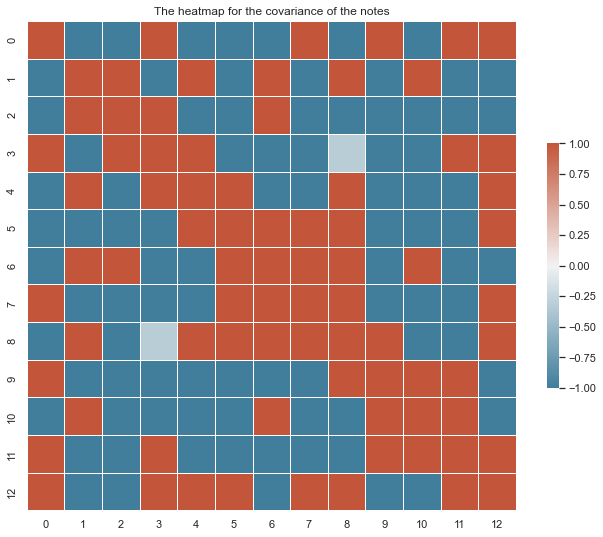

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
plt.rcParams.update({'font.size': 22})
cmap = sns.diverging_palette(230, 20, as_cmap=True)     # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(covariance,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("The heatmap for the covariance of the notes")
plt.show();

In [11]:
#split dataset into train and test set
dataset = []

def loadDataset(filename, split, trset, teset):
    with open('my.dat','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trset.append(dataset[x])
        else:
            teset.append(dataset[x])

trainingSet = []
testSet = []
loadDataset('my.dat', 0.66, trainingSet, testSet)

In [12]:
# Make the prediction using KNN(K nearest Neighbors)
length = len(testSet)
predictions = []
for x in range(length):
    predictions.append(nearestclass(getNeighbors(trainingSet, testSet[x], 5)))

accuracy1 = getAccuracy(testSet, predictions)
print(accuracy1)

0.7085714285714285


In [13]:
from collections import defaultdict
results = defaultdict(int)

directory = "genres_original"

i = 1
for folder in os.listdir(directory):
    results[i] = folder
    i += 1

In [14]:
pred = nearestclass(getNeighbors(dataset, feature, 5))
print(results[pred])

rock
